In [19]:
#FITS File: '/users/mirandaviederman/Downloads/FITS Files/N_or_S_data/apStar-r8-2M16452941-0242588.fits'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
import astropy
from astropy.io import fits

In [4]:
hduN = fits.open('/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M16452941-0242588.fits')
hduN.info()

Filename: /users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M16452941-0242588.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     215   ()      
  1                1 ImageHDU        13   (8575, 8)   float32   
  2                1 ImageHDU        13   (8575, 8)   float32   
  3                1 ImageHDU        13   (8575, 8)   int16   
  4                1 ImageHDU        13   (8575, 8)   float32   
  5                1 ImageHDU        13   (8575, 8)   float32   
  6                1 ImageHDU        13   (8575, 8)   float32   
  7                1 ImageHDU        13   (8575, 8)   float32   
  8                1 ImageHDU        29   (26,)   float64   
  9                1 BinTableHDU     90   1R x 33C   [180A, 6I, 24A, 6J, 6I, 6D, 6E, 6E, 6E, 6E, 2I, 2E, 2E, 2E, 2E, E, E, E, E, E, 6E, 6E, 6E, 6E, 6E, 6E, 6E, 3208E, 3208E, 401E, D, D, 401E]   


In [7]:
hduS = fits.open('/users/mirandaviederman/Downloads/FITS Files/S_data/apStar-t9-2M16452941-0242588.fits')
hduS[0].header

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                   16 /bits per data value                             
NAXIS   =                    0 /number of axes                                  
EXTEND  =                    T /file may contain extensions                     
DATE    = '2017-11-20'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
OBJID   = '2M16452941-0242588' / Object ID                                      
J       =              13.2570 / 2MASS J magnitude                              
H       =              12.5590 / 2MASS H magnitude                              
K       =              12.3880 / 2MASS Ks magnitude                             
AKTARG  =      0.0696107000000 / Extinction used for targeting                  
AKMETHOD= 'SFD      '       

   ## Comparative Plot

#### North

In [52]:
fluxesN = np.atleast_2d(hduN[1].data)
NexpN, NpixN = fluxesN.shape
wavelengthsN = 10. ** (hduN[0].header["CRVAL1"] + hduN[0].header["CDELT1"] * np.arange(NpixN))

#### South

In [53]:
fluxesS = np.atleast_2d(hduS[1].data)
NexpS, NpixS = fluxesS.shape
wavelengthsS = 10 ** (hduS[0].header["CRVAL1"] + hduS[0].header["CDELT1"] * np.arange(NpixS))

### Plotting

<IPython.core.display.Javascript object>


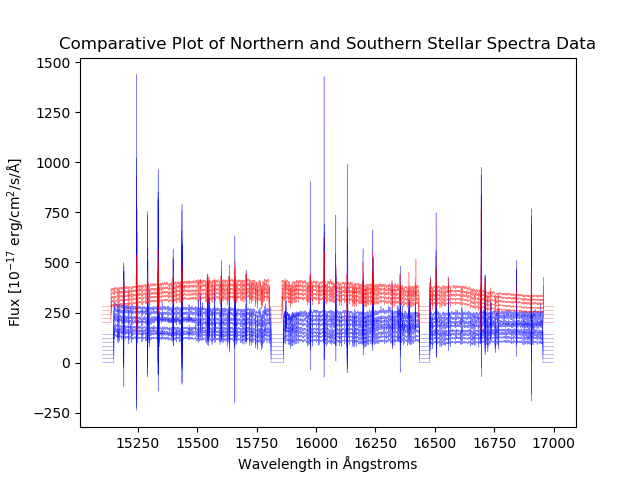

In [84]:
for exp in range(NexpN): #NORTH
    plt.step(wavelengthsN, 20*exp+fluxesN[exp], color="b", linewidth=.4, alpha=.5)

for exp in range(NexpS): #SOUTH
    plt.step(wavelengthsS, 20*exp+fluxesS[exp]+200, color="r", linewidth=0.4, alpha=.5)
    
#label = 'Exposure number: '+str(exp+1) --> 
    #find way to separate legends so that Northern data exposure numbers and 
    #Southern data exposure numbers can be easily distinguished

plt.ylabel(r'Flux [$10^{-17}$ erg/cm$^2$/s/Å]')
plt.xlabel("Wavelength in Ångstroms")
plt.title('Comparative Plot of Northern and Southern Stellar Spectra Data')

plt.legend(label='Data Source Telescope', loc='best', fontsize=8 )

#plt.ylim(0,500);
#plt.xlim(15250,15300);
#plt.xlim(16000,16100);
#plt.xlim(15750,15900);